In [1]:
using Luna

In [2]:
import Pkg; Pkg.add("PyPlot")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [3]:
import PyPlot: plt

In [86]:
λp = 1030e-9 # central wavelength of pump pulse
τfwhmp = 270e-15 # pulse duration of both pulses
#ep = 40e-6 # energy in pump pulse
ep = 500e-6 # FOR HE

λs = 343.33e-9 # central wavelength of seed pulse
τfwhms = 107e-15 # pulse duration of both pulses
#es = 40e-6 # energy in seed pulse
es = 105e-6 # FOR HE

#radius = 75e-6 # HCF core radius
#flength = 0.6 # HCF length
#gas = :He
#pressure = 1.45 # helium pressure in bar

radius = 37.5e-6 # HCF core radius
flength = 0.4 # HCF length
gas = :He #:Ne
pressure = 1.25# helium pressure in bar

1.25

In [343]:
λp = 1030e-9 # central wavelength of pump pulse
τfwhmp = 270e-15 # pulse duration of both pulses
#ep = 40e-6 # energy in pump pulse
ep = 500e-6 # FOR HE

λs = 257.5e-9 # central wavelength of seed pulse
τfwhms = 107e-15 # pulse duration of both pulses
#es = 40e-6 # energy in seed pulse
es = 150e-6 # FOR HE

radius = 75e-6 # HCF core radius
flength = 0.55 # HCF length
gas = :He
pressure = 0.5 # helium pressure in bar

#radius = 37.5e-6 # HCF core radius
#flength = 0.1 # HCF length
#gas = :He #:Ne
#pressure = 0.5# helium pressure in bar

0.5

In [344]:
pump = Pulses.GaussPulse(;λ0=λp, energy=ep, τfwhm=τfwhmp, polarisation=:linear)
seed_equal = Pulses.GaussPulse(;λ0=λs, energy=es, τfwhm=τfwhms, polarisation=:linear)

Luna.Interface.Pulses.GaussPulse{Luna.Fields.PulseField{Float64, Nothing, Luna.Fields.var"#3#4"{Float64, Int64}}}(:lowest, :linear, Luna.Fields.PulseField{Float64, Nothing, Luna.Fields.var"#3#4"{Float64, Int64}}(2.575e-7, 0.00015, nothing, Float64[], Luna.Fields.var"#3#4"{Float64, Int64}(1.07e-13, 1)))

In [345]:
equal = prop_capillary(radius, flength, gas, pressure; λ0=λp, pulses=[pump, seed_equal],
                       trange=900e-15, λlims=(140e-9, 1500e-9))

#pressures = [0.4,0.45,0.5,0.55,0.6]
#equal = [prop_capillary(radius, flength, gas, press; λ0=λp, pulses=[pump, seed_equal],
#                       trange=800e-15, λlims=(140e-9, 1500e-9)) for press in pressures]

#fiberlengths = [0.2,0.4,0.6,0.8,1.0]
#equal = [prop_capillary(radius, length, gas, pressure; λ0=λp, pulses=[pump, seed_equal],
#                       trange=800e-15, λlims=(140e-9, 1500e-9)) for length in fiberlengths]

┌ Info: X+Y polarisation not required.
└ @ Luna.Interface /Users/larsenk/.julia/packages/Luna/An5LJ/src/Interface.jl:353
┌ Info: Freq limits 0.20 - 2.14 PHz
└ @ Luna.Grid /Users/larsenk/.julia/packages/Luna/An5LJ/src/Grid.jl:40
┌ Info: Samples needed: 11563.42, samples: 16384, δt = 77.83 as
└ @ Luna.Grid /Users/larsenk/.julia/packages/Luna/An5LJ/src/Grid.jl:44
┌ Info: Requested time window: 900.0 fs, actual time window: 1275.2 fs
└ @ Luna.Grid /Users/larsenk/.julia/packages/Luna/An5LJ/src/Grid.jl:46
┌ Info: Grid: samples 8192 / 16384, ωmax 2.02e+16 / 4.04e+16
└ @ Luna.Grid /Users/larsenk/.julia/packages/Luna/An5LJ/src/Grid.jl:78
┌ Info: Using PPT ionisation rate.
└ @ Luna.Interface /Users/larsenk/.julia/packages/Luna/An5LJ/src/Interface.jl:534
┌ Info: Found cached PPT rate for 24.588208407672 eV, 1030.0 nm
└ @ Luna.Ionisation /Users/larsenk/.julia/packages/Luna/An5LJ/src/Ionisation.jl:144
┌ Info: Using mode-averaged propagation.
└ @ Luna.Interface /Users/larsenk/.julia/packages/Luna/An

MemoryOutput["simulation_type", "dumps", "meta", "Eω", "prop_capillary_args", "grid", "stats", "z"]

In [346]:
λ, Iλequal = Processing.getIω(equal, :λ, flength)
Iλequal = sum(Iλequal; dims=2)

#y = zeros(5,1420)
#y = zeros(5,2876)
#for n = 1:5
#    λ, Iλequal = Processing.getIω(equal[n], :λ, flength)
#    Iλequal = sum(Iλequal; dims=2)
#    y[n,:] = Iλequal
#end

2876×1 Matrix{Float64}:
 1.883608045810986e-28
 6.175165062525524e-29
 5.371395384167659e-29
 3.4957156984469486e-29
 5.8646529308724454e-30
 3.667555328100226e-29
 5.54425662035055e-28
 4.261878801675228e-28
 1.2791913960476893e-27
 1.6202172146818573e-28
 6.089658826199635e-28
 5.464714173834666e-27
 2.22694864338849e-25
 ⋮
 8.67238728170945e-21
 9.264200504695463e-24
 6.598541554537481e-21
 9.9365260684321e-21
 2.2608376126481083e-21
 1.0273718391550477e-21
 6.597873526351724e-21
 4.806610855762338e-21
 1.193666645207544e-22
 2.4124389257635707e-21
 4.753919268503459e-21
 1.532890545638254e-21

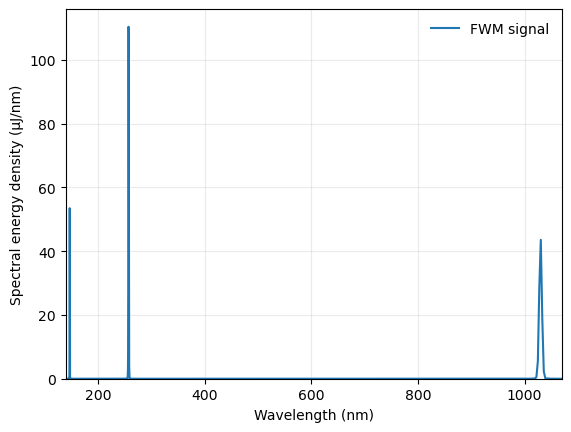

In [353]:
# plot the result
plt.figure()
#plt.semilogy(λ*1e9, Iλequal*1e-3, label="FWM signal")
plt.plot(λ*1e9, Iλequal*1e-3, label="FWM signal")
#plt.xlim(190, 1100)
plt.xlim(140, 1070)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Spectral energy density (μJ/nm)")
plt.ylim(ymin=1e-15)
plt.legend(frameon=0)
plt.grid(alpha=0.25)

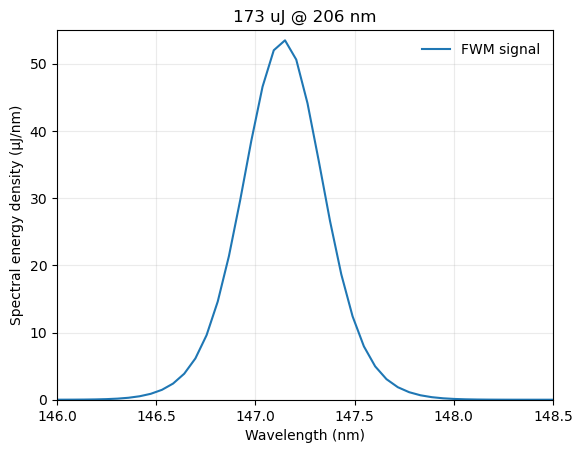

PyObject Text(0.5, 1.0, '173 uJ @ 206 nm')

In [350]:
plt.figure()
plt.plot(λ*1e9, Iλequal*1e-3, label="FWM signal")
#plt.xlim(196, 215)
plt.xlim(146, 148.5)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Spectral energy density (μJ/nm)")
plt.ylim(0,55)
plt.legend(frameon=0)
plt.grid(alpha=0.25)
#PEval = sum(Iλequal[380:430]*1e-3)/(λ[430]*1e9 - λ[380]*1e9)
plt.title("173 uJ @ 206 nm")

In [362]:
def Gaus(x,amp,x0,sigma):
    return (amp/(sigma*np.sqrt(2*np.pi)))*np.exp(-0.5*(x-x0)**2/sigma**2)

popt_, pcov_ = curve_fit(Gaus,λ[350:450]*1e9,savgol_filter(Iλequal[350:450]*1e-3,11,1)-0.4,bounds=([0,140,0],[10000000,150,20]),p0=(60000,147,5))
print(popt_[1])
print(popt_[2]*2.355)

LoadError: syntax: extra token "Gaus" after end of expression

In [ ]:
λ*1e9, Iλequal*1e-3

In [361]:
λ[350:450]

101-element Vector{Float64}:
 1.440442099974881e-7
 1.4409850483729117e-7
 1.4415284062342888e-7
 1.4420721740223817e-7
 1.4426163522012583e-7
 1.443160941235687e-7
 1.4437059415911384e-7
 1.444251353733787e-7
 1.444797178130512e-7
 1.4453434152488976e-7
 1.4458900655572367e-7
 1.4464371295245305e-7
 1.4469846076204898e-7
 ⋮
 1.4904223521767386e-7
 1.4910036401456063e-7
 1.4915853817141375e-7
 1.4921675774134793e-7
 1.4927502277756089e-7
 1.4933333333333337e-7
 1.4939168946202948e-7
 1.4945009121709673e-7
 1.4950853865206628e-7
 1.49567031820553e-7
 1.4962557077625574e-7
 1.496841555729575e-7

In [342]:
#λ[430]*1e9
#λ[327]*1e9 - λ[292]*1e9
sum(Iλequal[380:430]*1e-3)/(λ[430]*1e9 - λ[380]*1e9)

237.16200588907313

In [36]:
#λ[292:327]*1e9
#λ[327]*1e9 - λ[292]*1e9
sum(Iλequal[292:327]*1e-3)/(λ[327]*1e9 - λ[292]*1e9)

1.2234413351483092e-10

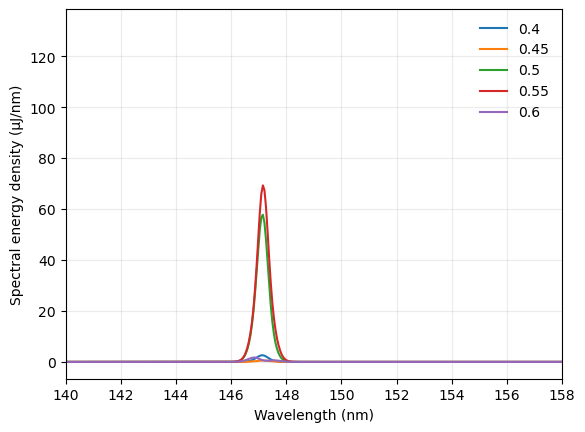

In [270]:
plt.figure()
for n = 1:5
    plt.plot(λ*1e9, y[n,:]*1e-3, label=pressures[n])
end
#plt.xlim(190, 220)
plt.xlim(140, 158)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Spectral energy density (μJ/nm)")
#plt.ylim(0,30)
plt.legend(frameon=0)
plt.grid(alpha=0.25)

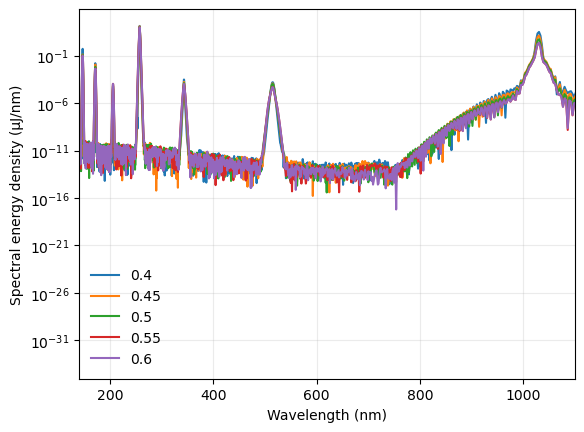

In [218]:
plt.figure()
for n = 1:5
    plt.semilogy(λ*1e9, y[n,:]*1e-3, label=pressures[n])
end
#plt.xlim(190, 220)
plt.xlim(140, 1100)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Spectral energy density (μJ/nm)")
#plt.ylim(0,0.9)
plt.legend(frameon=0)
plt.grid(alpha=0.25)

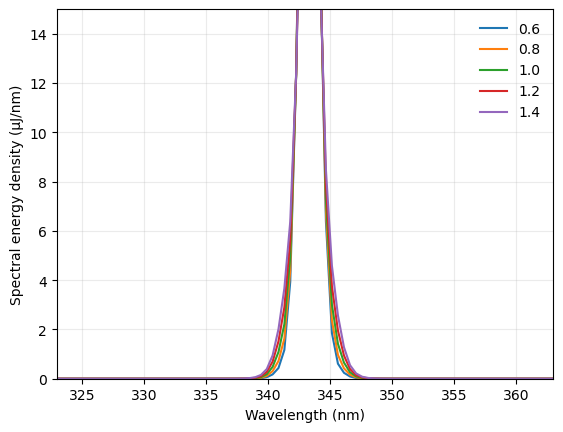

In [23]:
plt.figure()
for n = 1:5
    plt.plot(λ*1e9, y[n,:]*1e-3, label=pressures[n])
end
plt.xlim(323, 363)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Spectral energy density (μJ/nm)")
plt.ylim(0,15)
plt.legend(frameon=0)
plt.grid(alpha=0.25)

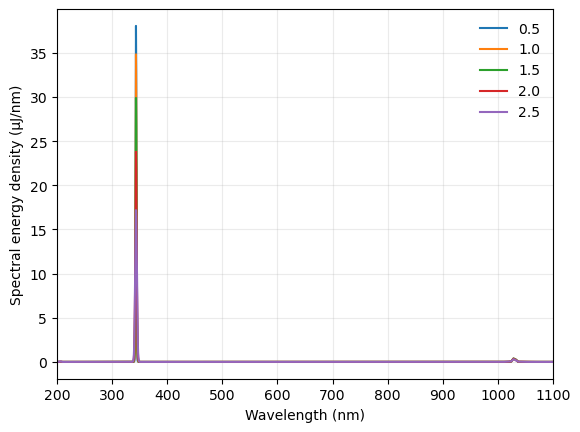

In [19]:
plt.figure()
for n = 1:5
    plt.plot(λ*1e9, y[n,:]*1e-3, label=pressures[n])
end
plt.xlim(200, 1100)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Spectral energy density (μJ/nm)")
#plt.ylim(0,15)
plt.legend(frameon=0)
plt.grid(alpha=0.25)